In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/Dataset of Diabetes .csv


In [32]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 6.3 MB/s eta 0:00:00


In [2]:
dataset = pd.read_csv("/kaggle/input/diabetes-dataset/Dataset of Diabetes .csv")
dataset.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Limpeza do Conjunto

In [3]:
del dataset["ID"]
del dataset["No_Pation"]

In [4]:
dataset['Gender'] = dataset['Gender'].map({'F': 0, 'f': 0, 'M': 1}).astype(int)

In [5]:
dataset.CLASS.value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [6]:
dataset['CLASS'] = dataset['CLASS'].map({'Y': 1, 'N': 0, 'P': 0, "Y ": 1, "N ": 0}).astype(int)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int64  
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 93.9 KB


In [8]:
dataset = dataset[["Gender", "AGE", "BMI", "Urea", "Cr", "HbA1c", "Chol", "TG",
                   "HDL", "LDL", "VLDL", "CLASS"]]

dataset.head()

,Gender,AGE,BMI,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,CLASS
0,0,50,24.0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0
1,1,26,23.0,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,0
2,0,50,24.0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0
3,0,50,24.0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0
4,1,33,21.0,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,0


In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
dataset.to_excel("Aravindpcoder (Cleaned).xlsx", index=False)

# Preparação

## Busca por Outliers

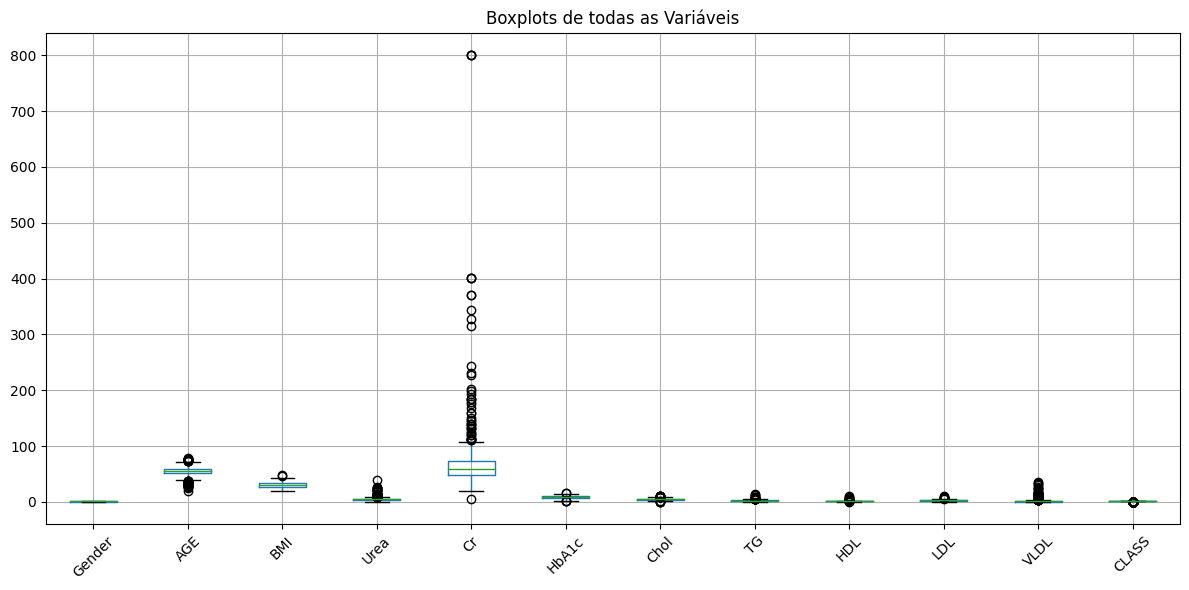

In [11]:
import matplotlib.pyplot as plt

dataset.boxplot(figsize=(12, 6))
plt.title("Boxplots de todas as Variáveis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
columns = ["Urea", "Cr", "HbA1c", "Chol", "TG", "HDL", "LDL", "VLDL"]
(dataset[columns] == 0).sum()

Urea     0
Cr       0
HbA1c    0
Chol     1
TG       0
HDL      0
LDL      0
VLDL     0
dtype: int64

In [13]:
import numpy as np

dataset["Chol"] = dataset["Chol"].replace({0: np.nan})
dataset["Chol"] = dataset["Chol"].fillna(dataset["Chol"].median())

In [14]:
columns = ["Urea", "Cr", "HbA1c", "Chol", "TG", "HDL", "LDL", "VLDL"]
(dataset[columns] == 0).sum()

Urea     0
Cr       0
HbA1c    0
Chol     0
TG       0
HDL      0
LDL      0
VLDL     0
dtype: int64

In [15]:
dataset["Cr"].mean()

69.02421307506053

In [16]:
dataset["Cr"].quantile(0.997)

610.4749999999909

In [17]:
dataset[dataset["Cr"] > 405]

,Gender,AGE,BMI,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,CLASS
273,1,58,33.0,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,1
846,1,56,35.0,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,1
860,1,60,33.0,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,1


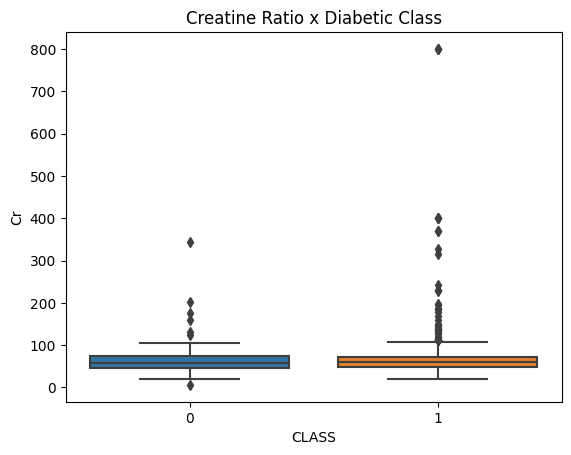

In [18]:
import seaborn as sns

sns.boxplot(x="CLASS", y="Cr", data=dataset)
plt.title("Creatine Ratio x Diabetic Class")
plt.show()

## Escalando
Fazendo uso do *RobustScaler* para lidar com a Creatinina, já que são casos clínicos extremos

In [19]:
from sklearn.preprocessing import RobustScaler

x, y = dataset.drop("CLASS", axis=1), dataset["CLASS"]

scaler = RobustScaler()

x_scaled = scaler.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

x_scaled

,Gender,AGE,BMI,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL
0,-1.0,-0.625,-0.857143,0.047962,-0.52,-0.864865,-0.3750,-0.743333,3.25,-0.6875,-0.625
1,0.0,-3.625,-1.000000,-0.047962,0.12,-0.864865,-0.6875,-0.410000,0.00,-0.2500,-0.500
2,0.0,-2.750,-1.285714,1.199041,-0.52,-0.864865,0.0625,-0.676667,-0.75,-0.3125,-0.750
3,-1.0,-1.250,-1.285714,-1.103118,-1.40,-1.108108,-1.1875,-0.676667,-0.25,-0.6250,-0.750
4,-1.0,-0.625,-0.857143,-1.247002,-0.36,-1.108108,-0.7500,-0.476667,-0.50,-0.2500,-0.500
...,...,...,...,...,...,...,...,...,...,...,...
821,-1.0,0.250,-0.142857,-0.239808,0.44,0.324324,0.3125,0.856667,-0.25,-0.6875,0.375
822,0.0,0.000,-0.428571,-0.719424,-0.80,0.108108,0.1250,0.323333,2.00,0.2500,-0.375
823,0.0,-3.375,1.000000,-0.527578,0.08,0.108108,-0.1875,-0.076667,0.00,0.0625,-0.250
824,0.0,1.750,1.000000,2.733813,5.04,-0.108108,0.0625,-0.076667,0.25,0.3125,-0.375


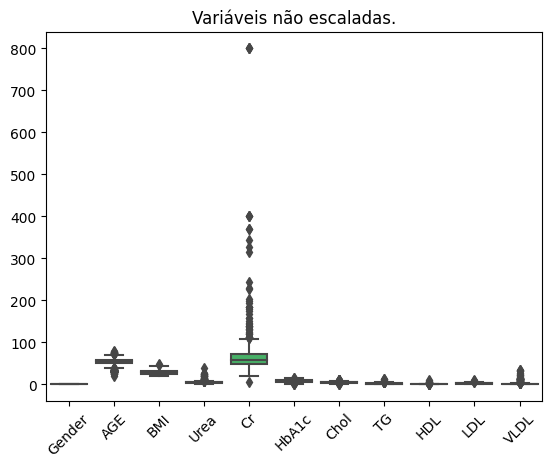

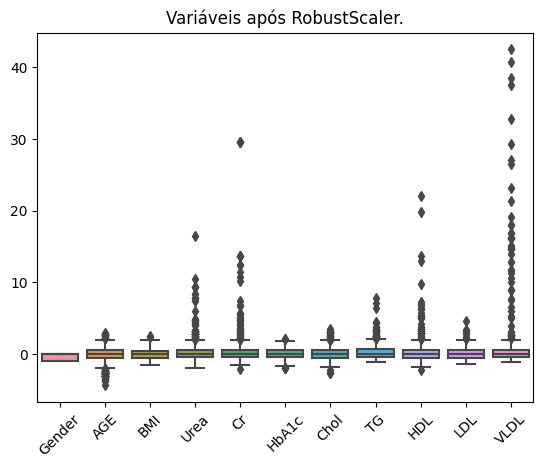

In [20]:
# Comparação
sns.boxplot(data=x)
plt.title("Variáveis não escaladas.")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=x_scaled)
plt.title("Variáveis após RobustScaler.")
plt.xticks(rotation=45)
plt.show()

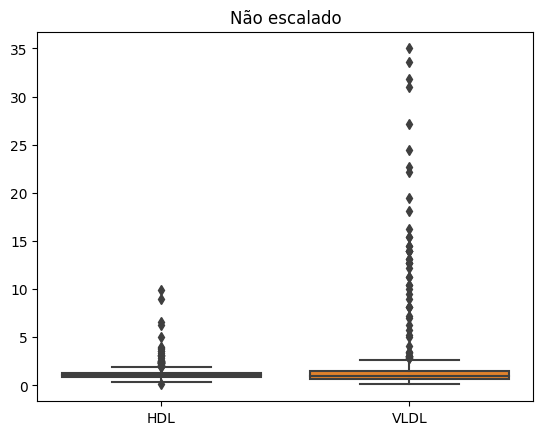

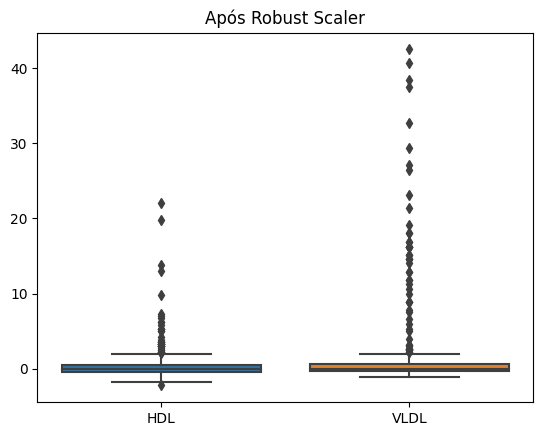

In [21]:
sns.boxplot(data=x[['HDL', 'VLDL']])
plt.title("Não escalado")
plt.show()

sns.boxplot(data=x_scaled[['HDL', 'VLDL']])
plt.title("Após Robust Scaler")
plt.show()

## Desbalanceamento de Classes

In [22]:
y.value_counts()

CLASS
1    690
0    136
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

smote = SMOTE(random_state = RANDOM_STATE)

x_smote, y_smote = smote.fit_resample(x_train, y_train)

print(f"Distribuição de Classes com SMOTE: {y_smote.value_counts()}")
print(f"Distribuição de Classes sem SMOTE: {y_train.value_counts()}")
print(f"Distribuição de Classes de Teste: {y_test.value_counts()}")

Distribuição de Classes com SMOTE: CLASS
1    551
0    551
Name: count, dtype: int64
Distribuição de Classes sem SMOTE: CLASS
1    551
0    109
Name: count, dtype: int64
Distribuição de Classes de Teste: CLASS
1    139
0     27
Name: count, dtype: int64


# Treinamento

In [27]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_validate

def avalia_modelo(modelo, x, y, dummy=False, multiclass=False):
    if dummy:
        resultados = cross_validate(modelo, x, y,
                                    scoring=["accuracy"],
                                    cv=10, n_jobs=-1)
        print(f'Modelo: {modelo}')
        media_acuracia = np.mean(resultados["test_accuracy"])
        print(f'Acurácia --> {media_acuracia:.4f}')
    
    if multiclass:
        resultados = cross_validate(modelo, x, y,
                                    scoring=["accuracy", "f1_weighted", "precision_weighted", "recall_weighted"],
                                    cv=5, n_jobs=-1)
        print(f'Modelo: {modelo}')
        
        print("\nMétricas Gerais")
        media_acuracia = np.mean(resultados["test_accuracy"])
        media_precisao = np.mean(resultados["test_precision_weighted"])
        media_recall = np.mean(resultados["test_recall_weighted"])
        media_f1 = np.mean(resultados["test_f1_weighted"])

        print(f'Acurácia --> {media_acuracia:.4f}')
        print(f'Precisão --> {media_precisao:.4f}')
        print(f'Recall --> {media_recall:.4f}')
        print(f'F1 --> {media_f1:.4f}')
    
    else:
        resultados = cross_validate(modelo, x, y,
                                    scoring=["accuracy", "f1", "precision", "recall"],
                                    cv=10, n_jobs=-1)
        print(f'Modelo: {modelo}')

        media_acuracia = np.mean(resultados["test_accuracy"])
        media_precisao = np.mean(resultados["test_precision"])
        media_recall = np.mean(resultados["test_recall"])
        media_f1 = np.mean(resultados["test_f1"])

        print(f'Acurácia --> {media_acuracia:.4f}')
        print(f'Precisão --> {media_precisao:.4f}')
        print(f'Recall --> {media_recall:.4f}')
        print(f'F1 --> {media_f1:.4f}')

        # Generate a detailed classification report using cross-validation predictions
        y_pred = cross_val_predict(modelo, x, y, cv=10)
        report = classification_report(y, y_pred)
        print("\nRelatório de Classificação:\n")
        print(report)


In [33]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tabpfn import TabPFNClassifier

In [40]:
models = [
    ('SVC', SVC(probability=True, random_state=RANDOM_STATE)),
    ('Logistic Regression', LogisticRegression(class_weight = "balanced", random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ('Random Forest', RandomForestClassifier(random_state=RANDOM_STATE)),
    ('AdaBoost', AdaBoostClassifier(random_state=RANDOM_STATE)),
    ('Extra Trees', ExtraTreesClassifier(random_state=RANDOM_STATE)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=RANDOM_STATE)),
    ('XGBoost', XGBClassifier(random_state=RANDOM_STATE)),
    ('LightGBM', LGBMClassifier(random_state=RANDOM_STATE, verbose=0)),
    ('CatBoost', CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)), 
]

# Evaluate each model
for name, model in models:
    print("\n")
    print("-" * 100)
    print(f"\nAvaliando o Modelo: {name}")
    avalia_modelo(model, x_smote, y_smote, multiclass=False, dummy=False)



----------------------------------------------------------------------------------------------------

Avaliando o Modelo: SVC
Modelo: SVC(probability=True, random_state=42)
Acurácia --> 0.9528
Precisão --> 0.9906
Recall --> 0.9146
F1 --> 0.9507

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       551
           1       0.99      0.91      0.95       551

    accuracy                           0.95      1102
   macro avg       0.96      0.95      0.95      1102
weighted avg       0.96      0.95      0.95      1102



----------------------------------------------------------------------------------------------------

Avaliando o Modelo: Logistic Regression
Modelo: LogisticRegression(class_weight='balanced', random_state=42)
Acurácia --> 0.9501
Precisão --> 0.9703
Recall --> 0.9292
F1 --> 0.9489

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.93   

| Modelo          | Acurácia | Precisão (Diabéticos) | Recall (Diabéticos) | F1 (Diabéticos) | Recall (Não Diabéticos) | F1 (Não Diabéticos) |
|----------------|----------|---------------------|------------------|--------------|------------------|--------------|
| LightGBM       | 98.55%   | 99.09%              | 98.00%           | 98.54%       | 96.00%           | 98.00%       |
| CatBoost       | 98.37%   | 99.62%              | 97.09%           | 98.33%       | 97.00%           | 98.00%       |
| Random Forest  | 98.00%   | 99.62%              | 96.36%           | 97.95%       | 96.00%           | 98.00%       |
| Extra Trees    | 97.91%   | 99.62%              | 96.19%           | 97.86%       | 96.00%           | 98.00%       |


In [42]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(x_smote, y_smote)

catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(x_smote, y_smote)

lgbm_probs = lgbm_model.predict_proba(x_test)[:, 1] 
catboost_probs = catboost_model.predict_proba(x_test)[:, 1]  

from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

lgbm_roc_auc = roc_auc_score(y_test, lgbm_probs)
catboost_roc_auc = roc_auc_score(y_test, catboost_probs)

print(f"LightGBM ROC AUC: {lgbm_roc_auc:.4f}")
print(f"CatBoost ROC AUC: {catboost_roc_auc:.4f}")

lgbm_precision, lgbm_recall, _ = precision_recall_curve(y_test, lgbm_probs)
catboost_precision, catboost_recall, _ = precision_recall_curve(y_test, catboost_probs)

lgbm_pr_auc = auc(lgbm_recall, lgbm_precision)
catboost_pr_auc = auc(catboost_recall, catboost_precision)

print(f"LightGBM Precision-Recall AUC: {lgbm_pr_auc:.4f}")
print(f"CatBoost Precision-Recall AUC: {catboost_pr_auc:.4f}")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# Modelo

In [45]:
import joblib

x_full = pd.concat([x_train, x_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

final_lgbm = LGBMClassifier(random_state=42)
final_lgbm.fit(x_full, y_full)

joblib.dump(final_lgbm, "aravindpcoder_diabetes_lightgbm.pkl")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

['aravindpcoder_diabetes_lightgbm.pkl']